# Superstore Churn 1.05: Feature Engineering

**Version 0.5**

by Linh Toan

[Data Science @ Newman University](https://newmanu.edu/academics/graduate-programs/ms-data-science)

# Import Libraries and Set Notebook Defaults

In [1]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Jupyter Notebook customizations

# Remove scientific notation from descriptive stats
pd.options.display.float_format = '{:,.3f}'.format

# Display all columns of a dataframe
pd.set_option('display.max_columns', None)

# Widen columns
pd.set_option('display.max_colwidth', 150)

In [3]:
# Customize Seaborn Plot Styles

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size to support high-pixel-density screens
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

# Set color palettes for plots
# See Matplotlib named color options here: https://matplotlib.org/stable/gallery/color/named_colors.html
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turquoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp5)

# Read and Review Data

In [6]:
# Read from CSV
# Set appropriate data types

# Set file path
path = './data/Global_Superstore_Orders_2020_23.csv'

# Read data
# Set Postal Code datatype to string and fill to 5 digits with leading zeros
df = pd.read_csv(path, dtype={'Postal Code': str})

# Fill postal codes to 5 characters with leading zeros when needed
df['Postal Code'] = df['Postal Code'].str.zfill(5)

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2020-01-01,2020-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",979.920,2,0.000,254.736,35.460,Medium
1,22253,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",288.878,3,0.100,86.486,9.720,Medium
2,48883,HU-2012-AT73557-40909,2020-01-01,2020-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",158.688,4,0.000,71.136,8.170,High
3,11731,IT-2012-EM14140124-40909,2020-01-01,2020-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",107.676,3,0.500,-62.532,4.820,High
4,22255,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",272.808,5,0.100,90.648,4.700,Medium


In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2023-12-31,2024-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",9.576,1,0.000,1.008,1.490,Medium
51286,27700,IN-2015-KM1622527-42369,2023-12-31,2024-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",190.728,3,0.000,60.912,1.410,Medium
51287,8857,MX-2015-CM1219093-42369,2023-12-31,2024-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",63.360,3,0.000,29.664,1.350,Medium
51288,2143,MX-2015-JB1604582-42369,2023-12-31,2024-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",40.176,3,0.000,1.584,1.324,Medium
51289,6852,MX-2015-TD2099582-42369,2023-12-31,2024-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",17.088,1,0.000,1.344,1.199,Medium


In [8]:
# Get number of rows and columns
df.shape

(51290, 24)

In [9]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.000","51,290.000","51,290.000","51,290.000","51,290.000","51,290.000"
mean,"25,645.500",591.577,3.477,0.143,68.666,26.479
std,"14,806.292","1,170.157",2.279,0.212,418.418,57.251
min,1.000,1.066,1.000,0.000,"-15,839.947",1.002
25%,"12,823.250",73.821,2.000,0.000,0.000,2.610
50%,"25,645.500",204.127,3.000,0.000,22.176,7.790
75%,"38,467.750",602.528,5.000,0.200,88.344,24.450
max,"51,290.000","54,332.352",14.000,0.850,"20,159.942",933.570


In [11]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,9994,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,631,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,10035,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,263,915,2001,9994,5883,14302,227,31289,6146,227,29433


# Feature Engineering

## Groupby Customer

In [28]:
# Group df by Customer ID get Total Sales per Customer ID

df.groupby('Customer ID')['Sales'].sum().reset_index()

,Customer ID,Sales
0,AA-10315102,"1,307.174"
1,AA-10315120,"6,512.184"
2,AA-10315139,"7,093.915"
3,AA-103151402,"11,473.325"
4,AA-103151404,"1,808.419"
...,...,...
17410,ZD-2192548,"3,125.203"
17411,ZD-2192564,"2,940.941"
17412,ZD-219257,143.856
17413,ZD-2192582,"1,627.443"


In [29]:
# Group by Customer ID and get the most recent order date
df.groupby('Customer ID')['Order Date'].max().reset_index()

,Customer ID,Order Date
0,AA-10315102,2023-01-07
1,AA-10315120,2021-05-16
2,AA-10315139,2023-08-04
3,AA-103151402,2023-06-30
4,AA-103151404,2021-10-04
...,...,...
17410,ZD-2192548,2021-12-11
17411,ZD-2192564,2020-02-21
17412,ZD-219257,2020-09-19
17413,ZD-2192582,2023-06-18


In [30]:
# Group by Customer ID and get the average Sales amount per order
df.groupby('Customer ID')['Sales'].mean().reset_index()

,Customer ID,Sales
0,AA-10315102,217.862
1,AA-10315120,"6,512.184"
2,AA-10315139,545.686
3,AA-103151402,"1,912.221"
4,AA-103151404,602.806
...,...,...
17410,ZD-2192548,781.301
17411,ZD-2192564,735.235
17412,ZD-219257,143.856
17413,ZD-2192582,813.722


In [31]:
# Group by Customer ID and get a count of product-orders per customer
df.groupby('Customer ID')['Row ID'].count().reset_index()

,Customer ID,Row ID
0,AA-10315102,6
1,AA-10315120,1
2,AA-10315139,13
3,AA-103151402,6
4,AA-103151404,3
...,...,...
17410,ZD-2192548,4
17411,ZD-2192564,4
17412,ZD-219257,1
17413,ZD-2192582,2


In [32]:
# Store as our feature-engineered dataframe for machine learning
# Groupby Customer ID and use aggregations for the earliest Order Date, the most recent Order Date,
# Mean Sales, Total Sales, Mean Profit, Total Profit, and a Count of all orders by each customer
# Use the Customer ID as the new row index

customers = df.groupby('Customer ID').agg(
    {'Order Date': ['min', 'max'], 'Sales': ['mean', 'sum'], 'Profit': ['mean', 'sum'], 'Row ID': 'count'}
)

customers.head(20)

Order Date                Sales              Profit             \
                    min        max      mean        sum     mean        sum   
Customer ID                                                                   
AA-10315102  2020-07-03 2023-01-07   217.862  1,307.174  -61.222   -367.330   
AA-10315120  2021-05-16 2021-05-16 6,512.184  6,512.184   65.016     65.016   
AA-10315139  2022-09-19 2023-08-04   545.686  7,093.915   95.016  1,235.203   
AA-103151402 2022-03-04 2023-06-30 1,912.221 11,473.325 -260.239 -1,561.433   
AA-103151404 2020-03-30 2021-10-04   602.806  1,808.419  219.546    658.637   
AA-103151406 2020-09-14 2020-09-14    35.400     70.800   15.939     31.878   
AA-1031545   2023-12-18 2023-12-18   883.850    883.850   10.346     10.346   
AA-1031548   2022-08-07 2022-08-07   163.555    163.555   54.403     54.403   
AA-1031558   2022-12-31 2023-12-23   654.516  1,309.032  231.696    463.392   
AA-103157    2023-08-25 2023-08-25   426.384    852.768  -32.580    -65.160   
AA-1031582   2020-11-23 2022-02-05   303.754  1,518.768  109.901    549.504   
AA-103751    2023-07-10 2023-07-10   516.226  2,581.128  200.218  1,001.088   
AA-10375101  2022-06-28 2022-06-28   146.092    584.366 -262.028 -1,048.114   
AA-103751402 2021-02-02 2021-02-02   214.044    428.088   74.479    148.958   
AA-103751404 2020-04-20 2022-07-11    43.685    174.739   11.263     45.052   
AA-103751406 2023-09-08 2023-12-12    99.231    496.157   33.081    165.407   
AA-103751408 2021-11-13 2022-11-15   359.088  1,436.352   76.575    306.301   
AA-1037545   2023-02-17 2023-02-17   217.152    217.152   19.008     19.008   
AA-103755    2023-08-27 2023-08-27    18.086     18.086  -10.570    -10.570   
AA-1037554   2022-12-11 2022-12-11    45.360     45.360  -81.648    -81.648   

             Row ID  
              count  
Customer ID          
AA-10315102       6  
AA-10315120       1  
AA-10315139      13  
AA-103151402      6  
AA-103151404      3  
AA-103151406      2  
AA-1031545        1  
AA-1031548        1  
AA-1031558        2  
AA-103157         2  
AA-1031582        5  
AA-103751         5  
AA-10375101       4  
AA-103751402      2  
AA-103751404      4  
AA-103751406      5  
AA-103751408      4  
AA-1037545        1  
AA-103755         1  
AA-1037554        1

## Linh's Feature Engineering

In [36]:
df['order_year'] = pd.to_datetime(df['Order Date']).dt.year
df_year = df.groupby(['Customer ID', 'Year'])['Order Date'].size().unstack(fill_value=0)
df_year = df_year.reset_index()
df_year

Year,Customer ID,2020,2021,2022,2023
0,AA-10315102,4,0,0,2
1,AA-10315120,0,1,0,0
2,AA-10315139,0,0,4,9
3,AA-103151402,0,0,4,2
4,AA-103151404,2,1,0,0
...,...,...,...,...,...
17410,ZD-2192548,2,2,0,0
17411,ZD-2192564,4,0,0,0
17412,ZD-219257,1,0,0,0
17413,ZD-2192582,0,1,0,1


In [92]:
df_final = pd.merge(df_year, customers, on=["Customer ID"])
df_final

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_37141/897278276.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_final = pd.merge(df_year, customers, on=["Customer ID"])


,Customer ID,2020,2021,2022,2023,"(Order Date, min)","(Order Date, max)","(Sales, mean)","(Sales, sum)","(Profit, mean)","(Profit, sum)","(Row ID, count)"
0,AA-10315102,4,0,0,2,2020-07-03,2023-01-07,217.862,"1,307.174",-61.222,-367.330,6
1,AA-10315120,0,1,0,0,2021-05-16,2021-05-16,"6,512.184","6,512.184",65.016,65.016,1
2,AA-10315139,0,0,4,9,2022-09-19,2023-08-04,545.686,"7,093.915",95.016,"1,235.203",13
3,AA-103151402,0,0,4,2,2022-03-04,2023-06-30,"1,912.221","11,473.325",-260.239,"-1,561.433",6
4,AA-103151404,2,1,0,0,2020-03-30,2021-10-04,602.806,"1,808.419",219.546,658.637,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17410,ZD-2192548,2,2,0,0,2020-11-21,2021-12-11,781.301,"3,125.203",-33.973,-135.893,4
17411,ZD-2192564,4,0,0,0,2020-02-21,2020-02-21,735.235,"2,940.941",-529.787,"-2,119.147",4
17412,ZD-219257,1,0,0,0,2020-09-19,2020-09-19,143.856,143.856,28.656,28.656,1
17413,ZD-2192582,0,1,0,1,2021-11-26,2023-06-18,813.722,"1,627.443",92.450,184.899,2


In [93]:
df_final['sales_mean'] = df_final[('Sales', 'mean')]
df_final['sales_sum'] = df_final[('Sales', 'sum')]
df_final['profit_mean'] = df_final[('Profit', 'mean')]
df_final['profit_sum'] = df_final[('Profit', 'sum')]
df_final['2022'] = df_final[2022]
df_final['2023'] = df_final[2023]

columns_to_drop = [
                    ('Order Date', 'min'), 
                    ('Order Date', 'max'), 
                    ('Sales', 'sum'), 
                    ('Sales', 'mean'),
                    ('Profit', 'mean'),
                    ('Profit', 'sum'),
                    ('Row ID', 'count'),
                    2020,
                    2021,
                    2022,
                    2023
                  ]
df_final = df_final.drop(columns=columns_to_drop, axis=1)

df_final

,Customer ID,sales_mean,sales_sum,profit_mean,profit_sum,2022,2023
0,AA-10315102,217.862,"1,307.174",-61.222,-367.330,0,2
1,AA-10315120,"6,512.184","6,512.184",65.016,65.016,0,0
2,AA-10315139,545.686,"7,093.915",95.016,"1,235.203",4,9
3,AA-103151402,"1,912.221","11,473.325",-260.239,"-1,561.433",4,2
4,AA-103151404,602.806,"1,808.419",219.546,658.637,0,0
...,...,...,...,...,...,...,...
17410,ZD-2192548,781.301,"3,125.203",-33.973,-135.893,0,0
17411,ZD-2192564,735.235,"2,940.941",-529.787,"-2,119.147",0,0
17412,ZD-219257,143.856,143.856,28.656,28.656,0,0
17413,ZD-2192582,813.722,"1,627.443",92.450,184.899,0,1


## Add Target Variable: Churn

Define churn as whether or not the customer made a purchase during the most recent year of our data:

- If the customer's most recent order was during the most recent year, then churn = 0

- If the customer's most recent order was prior to the most recent year, then churn = 1

In [94]:
# Create churn target variable
# If there are no orders in both 2022 and 2023, then the customer has churned. Otherwise they haven't.

df_final['churn'] = np.select([(df_final['2022'] == 0) & (df_final['2023'] == 0)], [0], default=1)
df_final.head(20)

,Customer ID,sales_mean,sales_sum,profit_mean,profit_sum,2022,2023,churn
0,AA-10315102,217.862,"1,307.174",-61.222,-367.330,0,2,1
1,AA-10315120,"6,512.184","6,512.184",65.016,65.016,0,0,0
2,AA-10315139,545.686,"7,093.915",95.016,"1,235.203",4,9,1
3,AA-103151402,"1,912.221","11,473.325",-260.239,"-1,561.433",4,2,1
4,AA-103151404,602.806,"1,808.419",219.546,658.637,0,0,0
5,AA-103151406,35.400,70.800,15.939,31.878,0,0,0
6,AA-1031545,883.850,883.850,10.346,10.346,0,1,1
7,AA-1031548,163.555,163.555,54.403,54.403,1,0,1
8,AA-1031558,654.516,"1,309.032",231.696,463.392,1,1,1
9,AA-103157,426.384,852.768,-32.580,-65.160,0,2,1


# Test Churn Prediction

Quickly test the quality of our feature engineering by creating predictions using an efficient and effective machine learning model:

The Random Forest Classifier from Scikit Learn

In [57]:
# Import libraries and packages for prediction and evaluation

# For creating train/test splits
from sklearn.model_selection import train_test_split

# For the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For evaluating a model's predictive performance
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix


In [97]:
# Create a train / test split, with 30% of the data for test.

# Create X and y variables
X = df_final[['2022', '2023', 'sales_mean', 'sales_sum', 'profit_mean', 'profit_sum']]
y = df_final['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# See the shape of each split compared to the total records: the number and proportion of train and test features and their labels
print(f'Total Records: {len(y)}')
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(y), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(y), 4) * 100}%')

# Preview the training data
X_train.head()

Total Records: 17415
Train Split: 12190 Records, 12190 Labels = 70.0%
Test Split: 5225 Records, 5225 Labels = 30.0%


,2022,2023,sales_mean,sales_sum,profit_mean,profit_sum
16852,0,7,262.850,"1,839.950",-11.258,-78.805
7103,0,0,197.184,197.184,67.008,67.008
16501,4,0,"2,454.858","9,819.432",738.864,"2,955.456"
13054,0,2,875.578,"1,751.155",57.465,114.931
4341,0,2,529.092,"1,058.184",163.152,326.304


In [98]:
# Predict churn using the Random Forest classification model from scikit learn

# Set Random Forest classifier as the algorithm for this prediction
algorithm = RandomForestClassifier(random_state=42)

# Train a prediction model by fitting the algorithm to the training set
model = algorithm.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

print('Predictions Complete\n')

# Dataframe of predicted churn probabilities and churn predictions (0 or 1) per customer
results_df = X_test.copy()
results_df['churn'] = y_test
results_df['predicted_probability'] = model.predict_proba(X_test)[:, 1]
results_df['prediction'] = y_pred

results_df.head(20)

Predictions Complete



,2022,2023,sales_mean,sales_sum,profit_mean,profit_sum,churn,predicted_probability,prediction
5527,0,0,60.923,121.846,-132.433,-264.866,0,0.010,0
3059,0,0,592.200,"1,184.400",134.928,269.856,0,0.000,0
14149,0,0,"2,375.719","4,751.438",270.583,541.166,0,0.000,0
16296,9,0,716.410,"6,447.686",-144.705,"-1,302.346",1,0.990,1
12084,1,0,28.469,28.469,-26.683,-26.683,1,0.990,1
4789,0,0,304.866,"1,219.464",118.793,475.173,0,0.000,0
6824,0,1,252.144,252.144,45.360,45.360,1,0.990,1
12539,0,0,812.547,"8,125.474",192.019,"1,920.189",0,0.030,0
11600,2,2,142.578,570.312,32.220,128.880,1,1.000,1
6119,0,1,675.216,675.216,249.696,249.696,1,1.000,1


In [99]:
# Report the accuracy, precision, and recall scores of the model

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

print('RESULTS')
print(f'Accuracy: \t{accuracy:.3f}%')
print(f'Precision: \t{precision:.3f}%')
print(f'Recall: \t{recall:.3f}%')

RESULTS
Accuracy: 	100.000%
Precision: 	100.000%
Recall: 	100.000%


In [100]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1561    0]
 [   0 3664]]


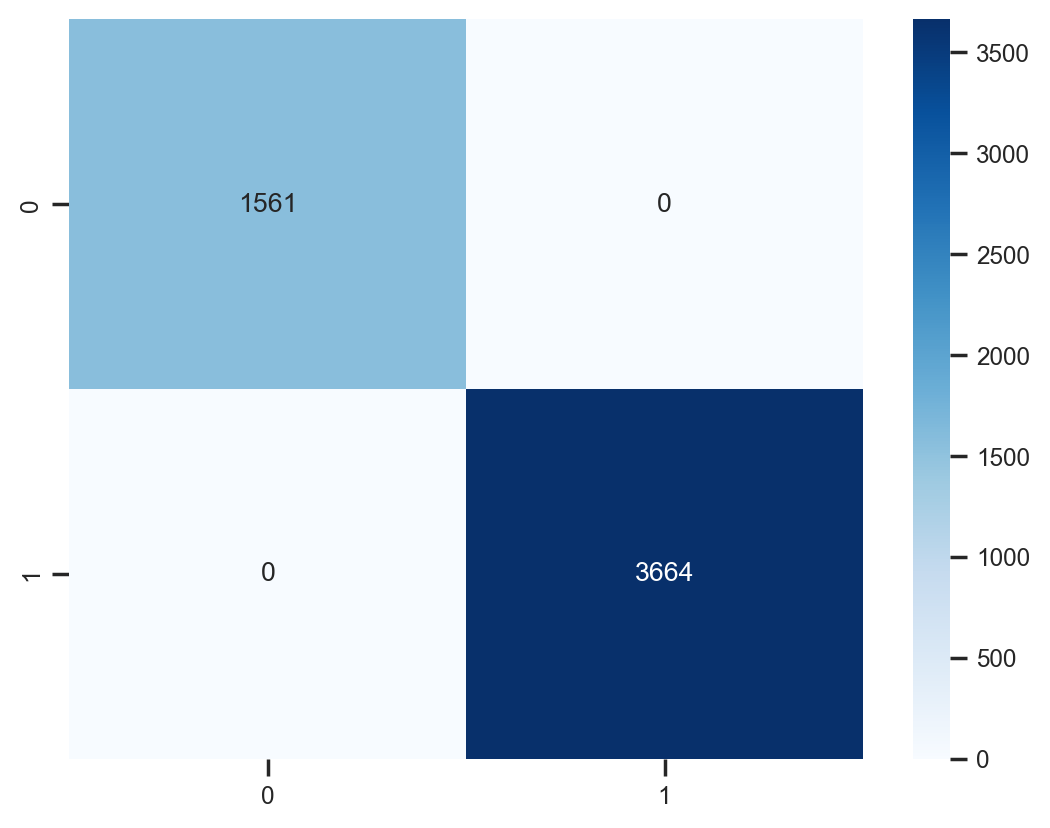

In [101]:
# Visualize the confusion matrix as a seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm, annot=True, cmap="Blues", fmt="d")
plt.show()

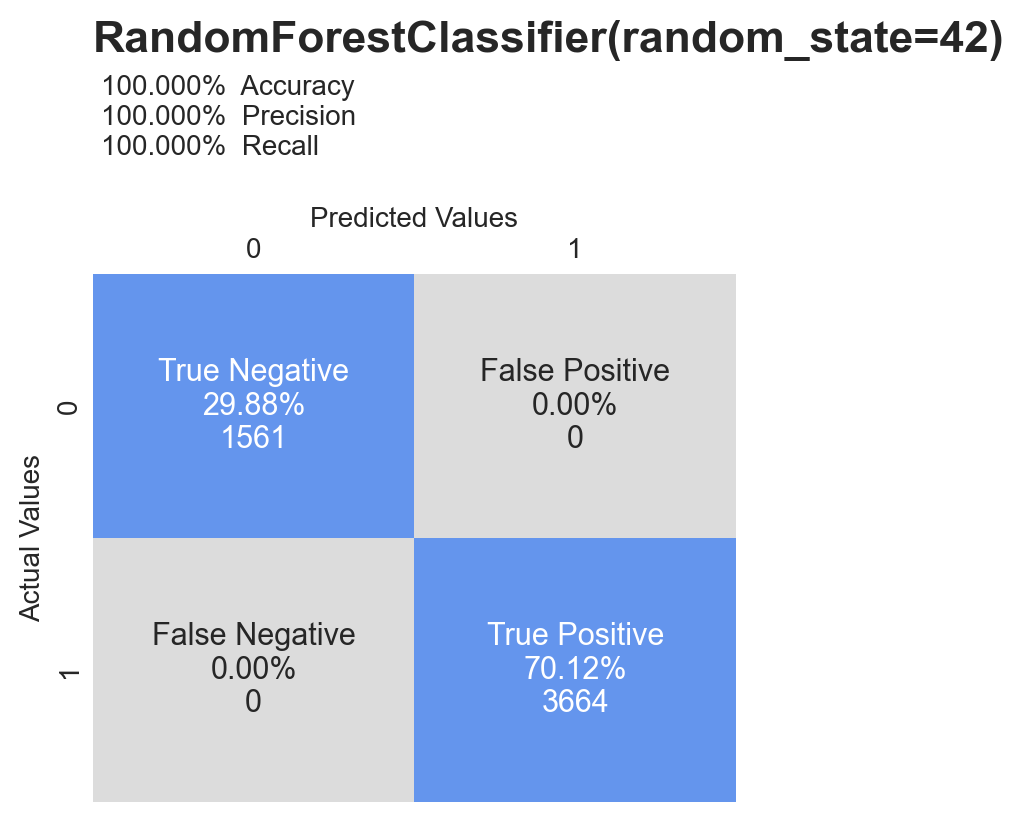

In [102]:
# Generate a better custom Confusion Matrix

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

cm = confusion_matrix(y_test, y_pred)
# Normalize true, pred, or all
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')
cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

# axis labels for the confusion matrix plot
cm_y_labels = ['0','1'] # column labels
cm_x_labels = ['0','1'] # row labels

# Confusion matrix labels
# Review and update to match the appropriate labels for your data set
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Begin plot setup
fig, ax = plt.subplots(figsize=(4.2, 4.2))

# Heatmap
sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='',
            cmap=cm_colors, cbar=False,
            yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)

# Axis elements
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

# Position group labels and set colors
for text_elt, group_label in zip(ax.texts, group_labels):
    ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
            ha='center', va='top')

# Title for each plot
# Adjust pad to provide room for the score report below title and above confusion matrix plot
plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')

# Score reports beneath each title
# Adjust x and y to fit report
plt.figtext(0.21, 0.81, f'{accuracy:.3f}%  Accuracy\n{precision:.3f}%  Precision\n{recall:.3f}%  Recall', wrap=True, ha='left', fontsize=10)

# Disply the plot!
plt.tight_layout()
plt.subplots_adjust(left=0.2)
print('\n') # Add a blank line for improved spacing
plt.show()